In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("E:\github\DS-Olympus-\machineLearning\carsPrediction\Dataset\cars.csv")

In [3]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data.shape

(261, 8)

In [5]:
data.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [6]:
# are there any null values??
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [8]:
# convert int to float
data[" cylinders"] = data[" cylinders"].astype("float64")
data[" hp"] = data[" hp"].astype("float64")
data[" time-to-60"] = data[" time-to-60"].astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    float64
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    float64
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    float64
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 16.4+ KB


<AxesSubplot:>

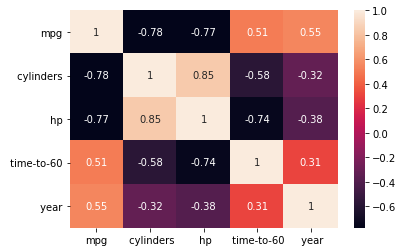

In [9]:
# understanding the correration between different features
corr_data = data.corr()
sns.heatmap(data = corr_data , annot = True)

In [28]:
# features & target
features = data[["mpg"," hp"," time-to-60"," cylinders"]]
target = data[" brand"]
print('------------------------------------- FEATURES ------------------------------------')
print(features)
print(" ")
print('------------ TARGET -------------')
print(target)

------------------------------------- FEATURES ------------------------------------
      mpg     hp   time-to-60   cylinders
0    14.0  165.0         12.0         8.0
1    31.9   71.0         14.0         4.0
2    17.0  140.0         11.0         8.0
3    15.0  150.0         10.0         8.0
4    30.5   63.0         17.0         4.0
..    ...    ...          ...         ...
256  17.0  130.0         15.0         8.0
257  36.1   60.0         16.0         4.0
258  22.0  112.0         15.0         6.0
259  18.0  100.0         16.0         6.0
260  22.0  105.0         15.0         6.0

[261 rows x 4 columns]
 
------------ TARGET -------------
0           US.
1       Europe.
2           US.
3           US.
4           US.
         ...   
256         US.
257      Japan.
258         US.
259         US.
260         US.
Name:  brand, Length: 261, dtype: object


In [29]:
# feature scaling
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
print('---------------------------- NEW FEATURES ---------------------------')
print(new_features)

---------------------------- NEW FEATURES ---------------------------
[[0.10928962 0.64673913 0.23529412 1.        ]
 [0.59836066 0.13586957 0.35294118 0.2       ]
 [0.19125683 0.51086957 0.17647059 1.        ]
 ...
 [0.32786885 0.35869565 0.41176471 0.6       ]
 [0.21857923 0.29347826 0.47058824 0.6       ]
 [0.32786885 0.32065217 0.41176471 0.6       ]]


In [99]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=99)

In [100]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

y_pred = m1.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-----------------------CLASSIFICATION REPORT----------------------')
print(cr)

-----------------------CLASSIFICATION REPORT----------------------
              precision    recall  f1-score   support

     Europe.       0.00      0.00      0.00        11
      Japan.       0.80      0.44      0.57        18
         US.       0.69      1.00      0.81        37

    accuracy                           0.68        66
   macro avg       0.50      0.48      0.46        66
weighted avg       0.60      0.68      0.61        66



In [101]:
m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)

y_pred = m2.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-----------------------CLASSIFICATION REPORT----------------------')
print(cr)

-----------------------CLASSIFICATION REPORT----------------------
              precision    recall  f1-score   support

     Europe.       0.57      0.73      0.64        11
      Japan.       0.78      0.39      0.52        18
         US.       0.79      0.92      0.85        37

    accuracy                           0.74        66
   macro avg       0.71      0.68      0.67        66
weighted avg       0.75      0.74      0.72        66



In [102]:
m3 = KNeighborsClassifier(n_neighbors=5)
m3.fit(x_train,y_train)

# prediction
y_pred = m3.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-----------------------CLASSIFICATION REPORT----------------------')
print(cr)

-----------------------CLASSIFICATION REPORT----------------------
              precision    recall  f1-score   support

     Europe.       0.60      0.82      0.69        11
      Japan.       0.90      0.50      0.64        18
         US.       0.83      0.92      0.87        37

    accuracy                           0.79        66
   macro avg       0.78      0.75      0.74        66
weighted avg       0.81      0.79      0.78        66



In [108]:
m4 = RandomForestClassifier(n_estimators=100)
abc = m4.fit(x_train,y_train)

# prediction
y_pred = m4.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-----------------------CLASSIFICATION REPORT----------------------')
print(cr)

-----------------------CLASSIFICATION REPORT----------------------
              precision    recall  f1-score   support

     Europe.       0.67      0.73      0.70        11
      Japan.       0.91      0.56      0.69        18
         US.       0.81      0.95      0.88        37

    accuracy                           0.80        66
   macro avg       0.80      0.74      0.75        66
weighted avg       0.82      0.80      0.79        66

